# Information about Dataset
The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species : Iris-setosa, Iris-versicolor, Iris-virginica


# Importing initially required modules

In [1]:
#Importing all the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
df = pd.DataFrame(iris_data)

# Basic functions

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df = df.drop(columns='Id',axis=1)

In [7]:
df.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width','Species']

Handling null values

In [8]:
df.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

In [9]:
# No null(missing) values found

Dropping duplicates

In [10]:
df[df.duplicated()]

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
df = df.drop_duplicates()

In [12]:
df.describe()
df.shape

(147, 5)

In [13]:
df1 = df.groupby('Species')[['Sepal_length','Sepal_width','Petal_length','Petal_width']].mean()

In [15]:
df1

,Sepal_length,Sepal_width,Petal_length,Petal_width
Species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


# Data Visualization

<AxesSubplot:xlabel='Species', ylabel='Sepal_length'>

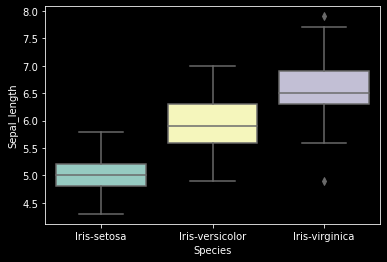

In [16]:
#boxplots of the species with all the 4 features
plt.style.use("dark_background")
sns.boxplot(data=df,x='Species',y='Sepal_length')

<AxesSubplot:xlabel='Species', ylabel='Sepal_width'>

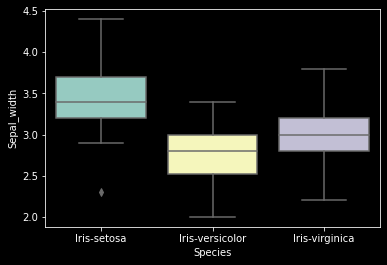

In [17]:
sns.boxplot(data=df,x='Species',y='Sepal_width')

<AxesSubplot:xlabel='Species', ylabel='Petal_length'>

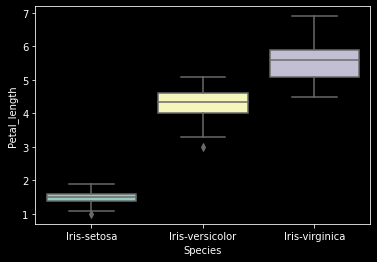

In [18]:
sns.boxplot(data=df,x='Species',y='Petal_length')

<AxesSubplot:xlabel='Species', ylabel='Petal_width'>

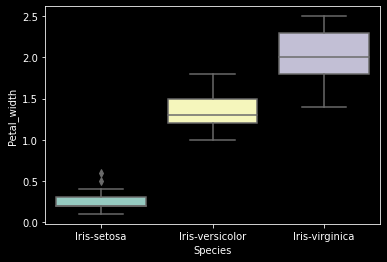

In [19]:
sns.boxplot(data=df,x='Species',y='Petal_width')

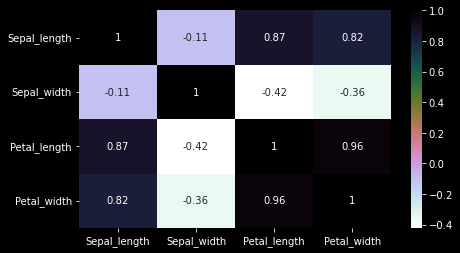

In [20]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

In [21]:
#scatterplots of the species with all 4 features
colours = ['red','blue','yellow']
spec = list(df['Species'].unique())

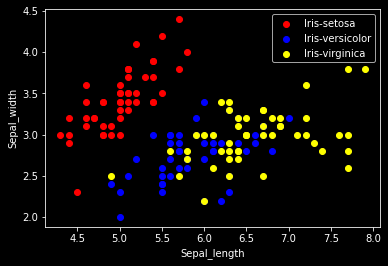

In [22]:
for i in range(len(spec)):
    temp_df = df[df['Species']==spec[i]]
    plt.scatter(temp_df['Sepal_length'],temp_df['Sepal_width'],c = colours[i], label = spec[i])
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend()

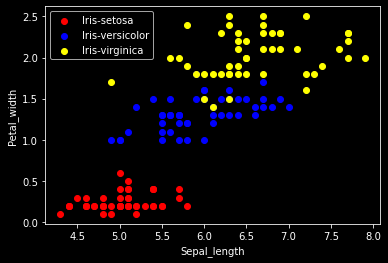

In [23]:
for i in range(len(spec)):
    temp_df = df[df['Species']==spec[i]]
    plt.scatter(temp_df['Sepal_length'],temp_df['Petal_width'],c = colours[i], label = spec[i])
plt.xlabel('Sepal_length')
plt.ylabel('Petal_width')
plt.legend()

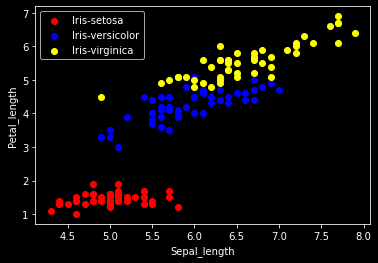

In [24]:
for i in range(len(spec)):
    temp_df = df[df['Species']==spec[i]]
    plt.scatter(temp_df['Sepal_length'],temp_df['Petal_length'],c = colours[i], label = spec[i])
plt.xlabel('Sepal_length')
plt.ylabel('Petal_length')
plt.legend()

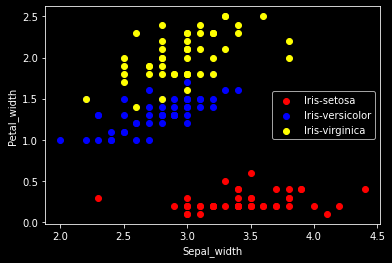

In [25]:
for i in range(len(spec)):
    temp_df = df[df['Species']==spec[i]]
    plt.scatter(temp_df['Sepal_width'],temp_df['Petal_width'],c = colours[i], label = spec[i])
plt.xlabel('Sepal_width')
plt.ylabel('Petal_width')
plt.legend()

werh

# Label encoding

In [26]:
df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Species'] = labelencoder.fit_transform(df['Species'])

In [28]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int32

This shows Iris-setosa : 0, Iris-versicolor : 1, Iris-virginica : 2

# Separating Features and targets as X and Y

In [29]:
Y = df['Species'] #targets

In [30]:
X = df.drop(columns=['Species']) #features

# Modules for Model building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [33]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=3)

In [34]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(117, 4) (30, 4) (117,) (30,)


# Model building

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)

# Model Training

In [36]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

# Model Evaluation

In [37]:
yt_predicted = knn.predict(Xtrain)

In [38]:
train_acc = accuracy_score(Ytrain,yt_predicted)

In [39]:
y_predicted = knn.predict(Xtest)

In [40]:
test_acc = accuracy_score(Ytest,y_predicted)

In [41]:
print('Train accuracy: ',train_acc,'\nTest accuracy: ',test_acc)

Train accuracy:  0.9829059829059829 
Test accuracy:  0.9333333333333333


# Model Deployment

In [42]:
import pickle

In [46]:
pickle_out = open("knn1.pkl","wb")

In [47]:
pickle.dump(knn,pickle_out)

In [48]:
loaded_model2 = pickle.load(open('knn1.pkl','rb'))

In [49]:
prediction = loaded_model2.predict([[4.9,3.0,1.4,0.2]])# sep_len, sep_wid, petal_len, petal_wid

print(prediction[0])   # Iris-setosa : 0, Iris-versicolor : 1, Iris-virginica : 2
if prediction[0]:
    print('Iris-versicolor')
elif prediction[0]==0:
    print('Iris-setosa')
else:
    print('Iris-virginica')

0
Iris-setosa


C:\Users\Jai\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
sklearn.__version__


'1.3.1'

In [45]:
import sklearn